# Setup

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Parameters

In [2]:
bounds_AS = [68,79,3,20]
bounds_SL = [79,87,2,11]
bounds_wBoB = [79,87,11,21]
bounds_BoB = [87,100,0,23]

# coastal mask bounds
cm_bounds = [48.5, 102.5,-1.5, 33]

IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

# Get Data

In [3]:
# load DMI data
ds_DMI= xr.open_dataset('../data/dmi_processed.nc')

# lists of positive iod years for now taken from sources above 1994-2018 unsure after 2016
posIODyears = list(np.array(ds_DMI.pos_IOD_years)) #[1994,1997,2006,2012,2015]
negIODyears = list(np.array(ds_DMI.neg_IOD_years)) #[1996,1998,2001,2010,2014,2016]
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) # [1995,1999,2000,2002,2003,2004,2005,2007,2008,2009,2011,2012,2013]

sposIODyears = list(np.array(ds_DMI.spos_IOD_years)) 
snegIODyears = list(np.array(ds_DMI.sneg_IOD_years)) 

wposIODyears = list(np.array(ds_DMI.wpos_IOD_years)) 
wnegIODyears = list(np.array(ds_DMI.wneg_IOD_years)) 

ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 6, sposyears: 6, time: 744, wnegyears: 4, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-06-01 1958-07-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1970 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
    neg_IOD_years    (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
    neu

In [4]:
ds_CHL = xr.open_dataset('../data/chl_to_sla.nc')
ds_CHL

<xarray.Dataset>
Dimensions:           (lat: 138, lon: 216, month: 12, time: 273)
Coordinates:
  * time              (time) datetime64[ns] 1997-09-04 1997-10-01 ... 2020-05-01
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_chl_mon_anom  (time, lat, lon) float64 ...
    mon_chl_mon_clim  (month, lat, lon) float64 ...

In [5]:
ds_SLA = xr.open_dataset('../data/sla_processed.nc')
ds_SLA

<xarray.Dataset>
Dimensions:           (day_time: 10013, lat: 138, loc_list: 5, lon: 216, month: 12, no_stations: 367, time: 329)
Coordinates:
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * day_time          (day_time) datetime64[ns] 1993-01-01 ... 2020-05-31
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * no_stations       (no_stations) float64 1.0 2.0 3.0 ... 365.0 366.0 367.0
  * loc_list          (loc_list) int64 0 75 225 313 366
Data variables:
    daily_sla         (day_time, lat, lon) float64 ...
    mon_sla           (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    sta_loninds       (no_stations) int64 ...
    sta_latinds       (no_stations) int64 ...
    sta_lon           (no_station

# Group SLA into IOD years

In [6]:
mon_sla = ds_SLA['mon_sla']
mon_sla_mon_anom = ds_SLA['mon_sla_mon_anom']
mon_chl_mon_anom = ds_CHL['mon_chl_mon_anom']
mon_sla_mon_clim = ds_SLA['mon_sla_mon_clim']
lat = mon_sla.lat.values
lon = mon_sla.lon.values
# ------------------------------------------------------------#
# Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
posIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(mon_sla_mon_anom,IODyear_begin,IODyear_end,posIODyears, roll = False)
posIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(mon_chl_mon_anom,IODyear_begin,IODyear_end,posIODyears, roll = False)

# average over the negative IOD years -------------------------------------------# 
negIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(mon_sla_mon_anom,IODyear_begin,IODyear_end,negIODyears, roll = False)
negIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(mon_chl_mon_anom,IODyear_begin,IODyear_end,negIODyears, roll = False)


/home/jennap/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [7]:
xx,yy = np.meshgrid(np.array(ds_SLA.lon),np.array(ds_SLA.lat))
xx_mask = xx.flatten()
yy_mask = yy.flatten()
mask = mask_coast(xx_mask,yy_mask,np.array(cm_bounds))
mask = np.reshape(mask,xx.shape)

In [19]:
# seasonal anomaly

seas_anom_sla_sf = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)
seas_anom_sla_ws = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)

piod_anom_sla_sf = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)
piod_anom_sla_ws = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)
niod_anom_sla_sf = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)
niod_anom_sla_ws = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)

piod_anom_chl_sf = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)
piod_anom_chl_ws = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)
niod_anom_chl_sf = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)
niod_anom_chl_ws = np.full([len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)

for ss in range(2):
    if ss == 0:
        ind = [5,6,7,8,9,10] # Summer/Fall - -1 for index
        seas_anom_sla_sf = np.nanmean(ds_SLA.mon_sla_mon_clim[ind,:,:],0)
        piod_anom_sla_sf = np.nanmean(posIOD_mon_sla_mon_anom[ind,:,:],0)
        niod_anom_sla_sf = np.nanmean(negIOD_mon_sla_mon_anom[ind,:,:],0)
        piod_anom_chl_sf = np.nanmean(posIOD_mon_chl_mon_anom[ind,:,:],0)
        niod_anom_chl_sf = np.nanmean(negIOD_mon_chl_mon_anom[ind,:,:],0)
    elif ss == 1:
        ind = [0,1,2,3,4,11] # Winter/Spring
        seas_anom_sla_ws = np.nanmean(ds_SLA.mon_sla_mon_clim[ind,:,:],0)
        piod_anom_sla_ws = np.nanmean(posIOD_mon_sla_mon_anom[ind,:,:],0)
        niod_anom_sla_ws = np.nanmean(negIOD_mon_sla_mon_anom[ind,:,:],0)
        piod_anom_chl_ws = np.nanmean(posIOD_mon_chl_mon_anom[ind,:,:],0)
        niod_anom_chl_ws = np.nanmean(negIOD_mon_chl_mon_anom[ind,:,:],0)
        
# mask coast
seas_anom_sla_sf[~mask] = np.nan
piod_anom_sla_sf[~mask] = np.nan
niod_anom_sla_sf[~mask] = np.nan
piod_anom_chl_sf[~mask] = np.nan
niod_anom_chl_sf[~mask] = np.nan

seas_anom_sla_ws[~mask] = np.nan
piod_anom_sla_ws[~mask] = np.nan
niod_anom_sla_ws[~mask] = np.nan
piod_anom_chl_ws[~mask] = np.nan
niod_anom_chl_ws[~mask] = np.nan

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mea

# Plot

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in greater_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: RuntimeWarning: invalid value encountered in greater_equal


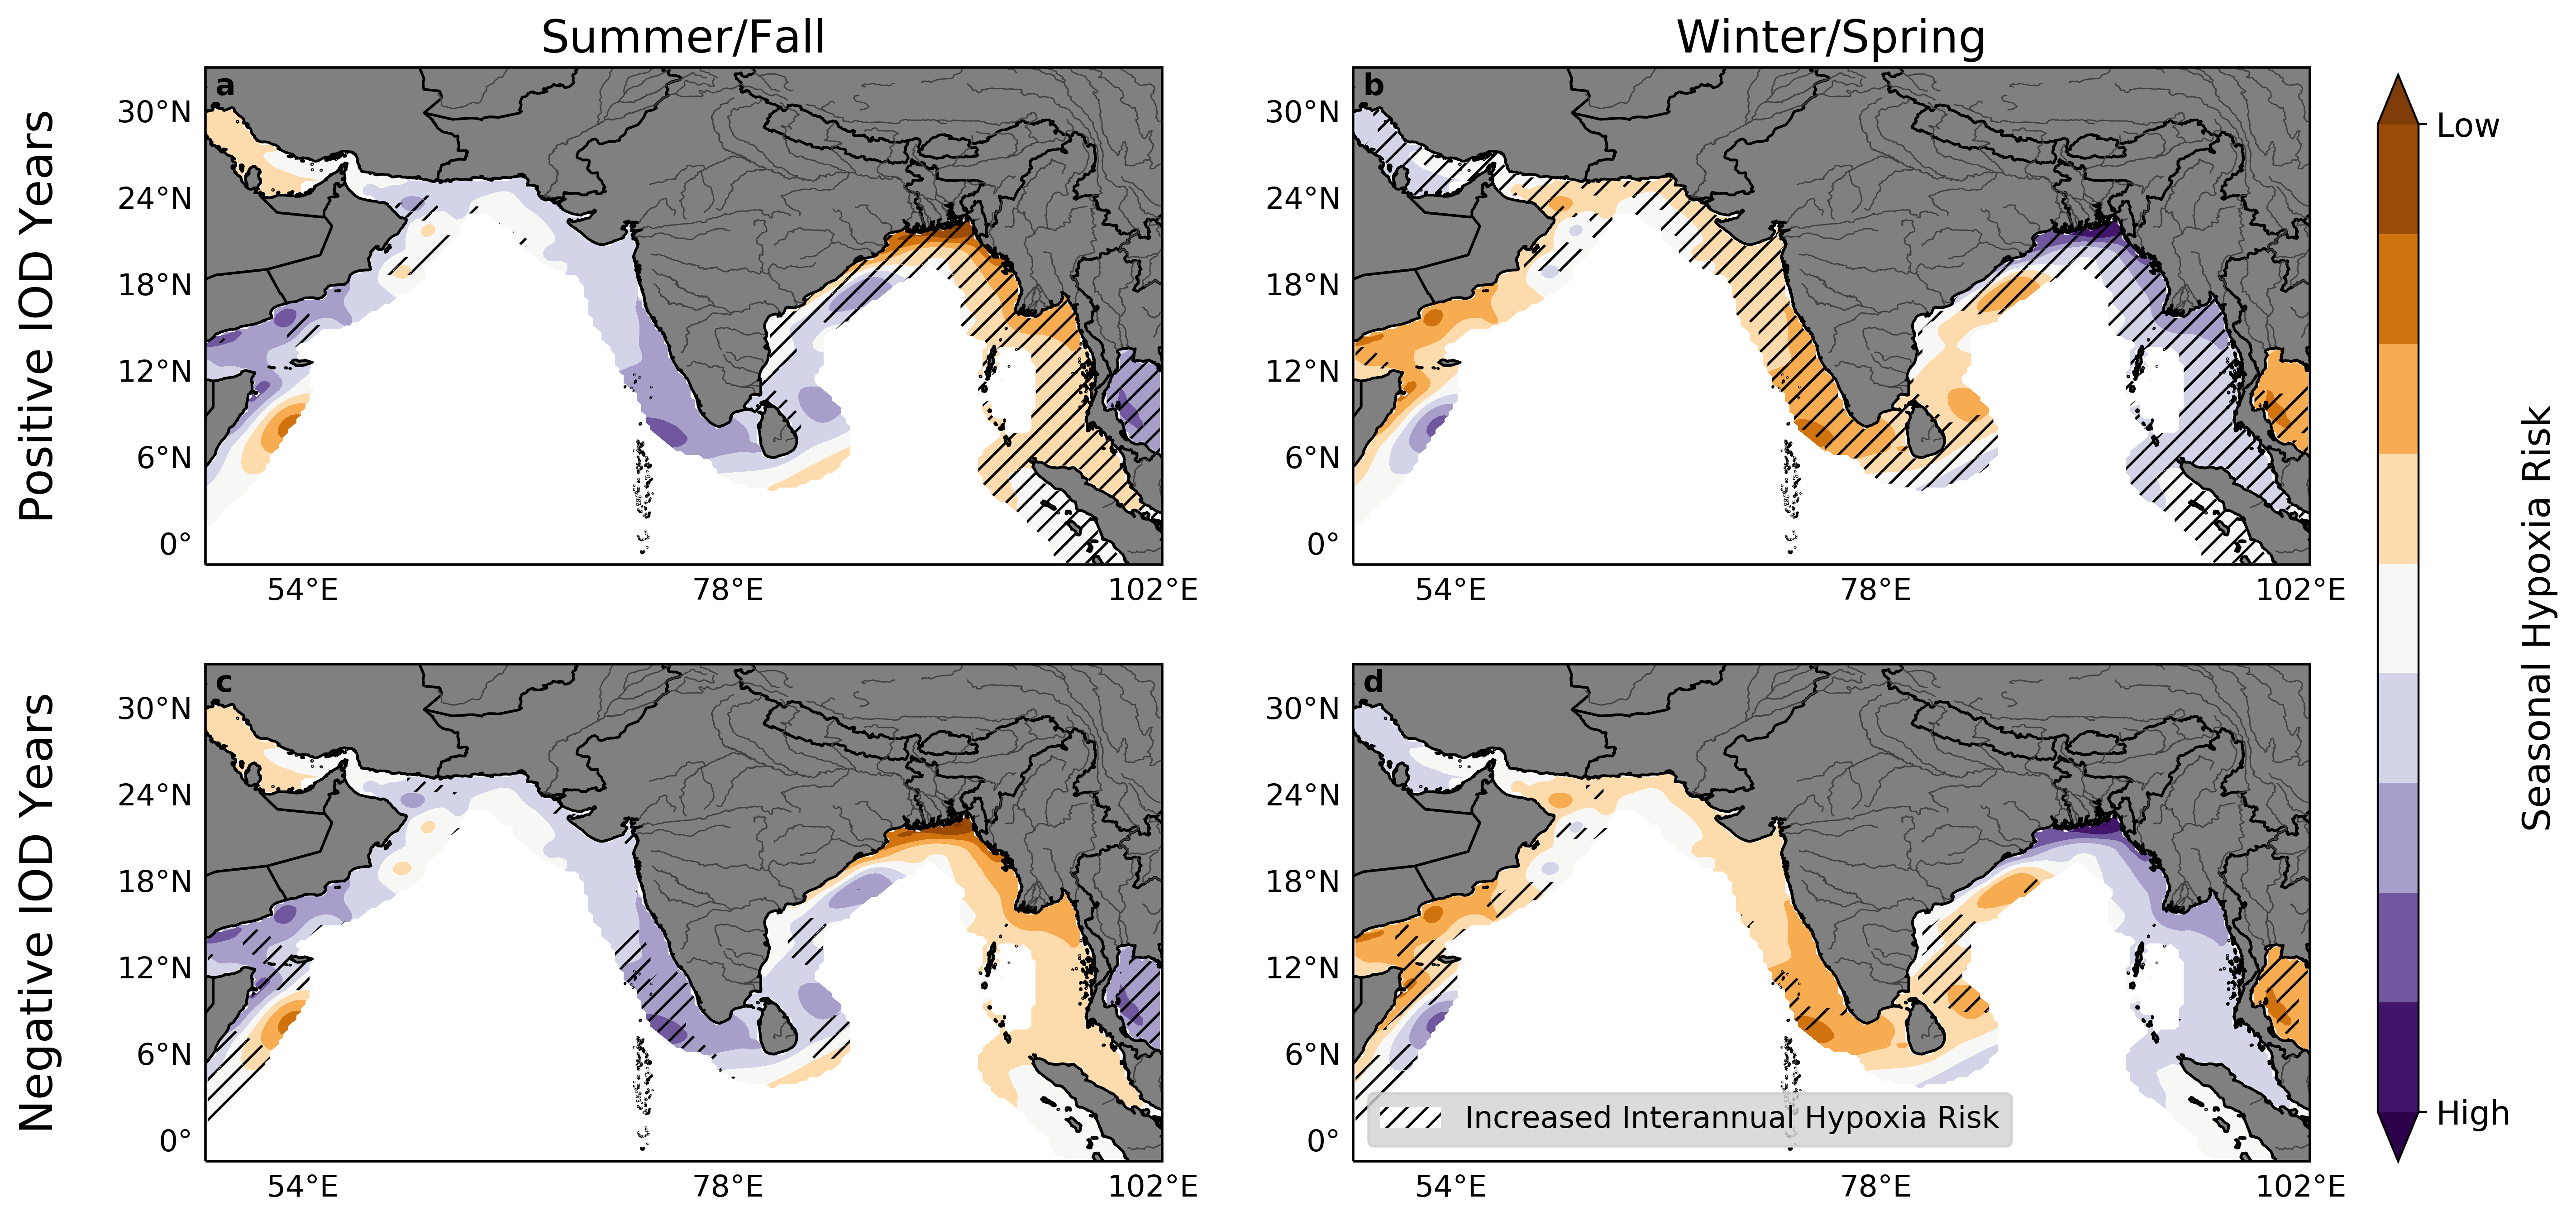

In [22]:
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse

fig = plt.figure(figsize=(15,8),dpi=400)

cmin = -0.15
cmax = 0.15

levels = np.linspace(cmin, cmax, 10)
sz = 30
fsz = 12
alpha = 0.25

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
c = ax.contourf(xx,yy,seas_anom_sla_sf,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# add in inc piod risk
hatch_inc_p = np.array(seas_anom_sla_sf)
hatch_inc_p[piod_anom_sla_sf>=0] = np.nan
ax.contourf(xx,yy,hatch_inc_p,hatches=['///'],
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# # add in dec piod risk
# hatch_dec_p = np.array(seas_anom_sla_sf)
# hatch_dec_p[piod_anom_sla_sf<=0] = np.nan
# ax.contourf(xx,yy,hatch_dec_p, 
#           levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# add bio feedback
e = Ellipse(xy=(78,12),width=1, height=2,angle=0, transform = ccrs.PlateCarree())
ax.add_artist(e)
g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title('Summer/Fall')
ylabel_map(ax,'Positive IOD Years')
add_letter(ax, 'a')

# -----------------------------------------------------------

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
ax.contourf(xx,yy,seas_anom_sla_ws,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# add in inc piod risk
hatch_inc_p = np.array(seas_anom_sla_ws)
hatch_inc_p[piod_anom_sla_ws>=0] = np.nan
ax.contourf(xx,yy,hatch_inc_p,hatches=['///'],
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# add in dec piod risk
# hatch_dec_p = np.array(seas_anom_sla_ws)
# hatch_dec_p[piod_anom_sla_ws<=0] = np.nan
# ax.contourf(xx,yy,hatch_dec_p, 
#           levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

ax.set_xlim(48.5,102.5)
ax.set_ylim(-1.5,33)
g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title('Winter/Spring')
add_letter(ax, 'b')

# -----------------------------------------------------------

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())

ax.contourf(xx,yy,seas_anom_sla_sf,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# add in inc niod risk
hatch_inc_n = np.array(seas_anom_sla_sf)
hatch_inc_n[niod_anom_sla_sf>=0] = np.nan
ax.contourf(xx,yy,hatch_inc_n,hatches=['///'],
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# # add in dec niod risk
# hatch_dec_n = np.array(seas_anom_sla_sf)
# hatch_dec_n[niod_anom_sla_sf<=0] = np.nan
# ax.contourf(xx,yy,hatch_dec_n,
#           levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ylabel_map(ax,'Negative IOD Years')
add_letter(ax, 'c')

# -----------------------------------------------------------

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())

ax.contourf(xx,yy,seas_anom_sla_ws,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# add in inc piod risk
hatch_inc_n = np.array(seas_anom_sla_ws)
hatch_inc_n[niod_anom_sla_ws>=0] = np.nan
ax.contourf(xx,yy,hatch_inc_n,hatches=['///'],
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# # add in dec piod risk
# hatch_dec_n = np.array(seas_anom_sla_ws)
# hatch_dec_n[niod_anom_sla_ws<=0] = np.nan
# ax.contourf(xx,yy,hatch_dec_n, 
#           levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")


g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
add_letter(ax, 'd')

# -----------------------------------------------------------

p1 = mpatches.Patch(facecolor='w',hatch='///', label = 'Increased Interannual Hypoxia Risk')
# p2 = mpatches.Patch(facecolor='w',hatch='\\\\\\',label = 'Decreased Interannual Hypoxia Risk')
# p3 = mpatches.Patch(facecolor='g',label = 'Positive Biological Feedback')
# p3.set_edgecolor('g')

# plt.legend(handles = [p1],ncol = 4, fontsize = 12, facecolor = 'lightgrey',
#           loc='lower center', bbox_to_anchor=(-.1, -.3))

plt.legend(handles = [p1],ncol = 4, fontsize = 12, facecolor = 'lightgrey',loc=3)

cb = add_single_vert_cbar(fig,c,label = 'Seasonal Hypoxia Risk', extend = 'both')
cb.set_ticks([cmin,cmax])
cb.set_ticklabels(['High','Low'])

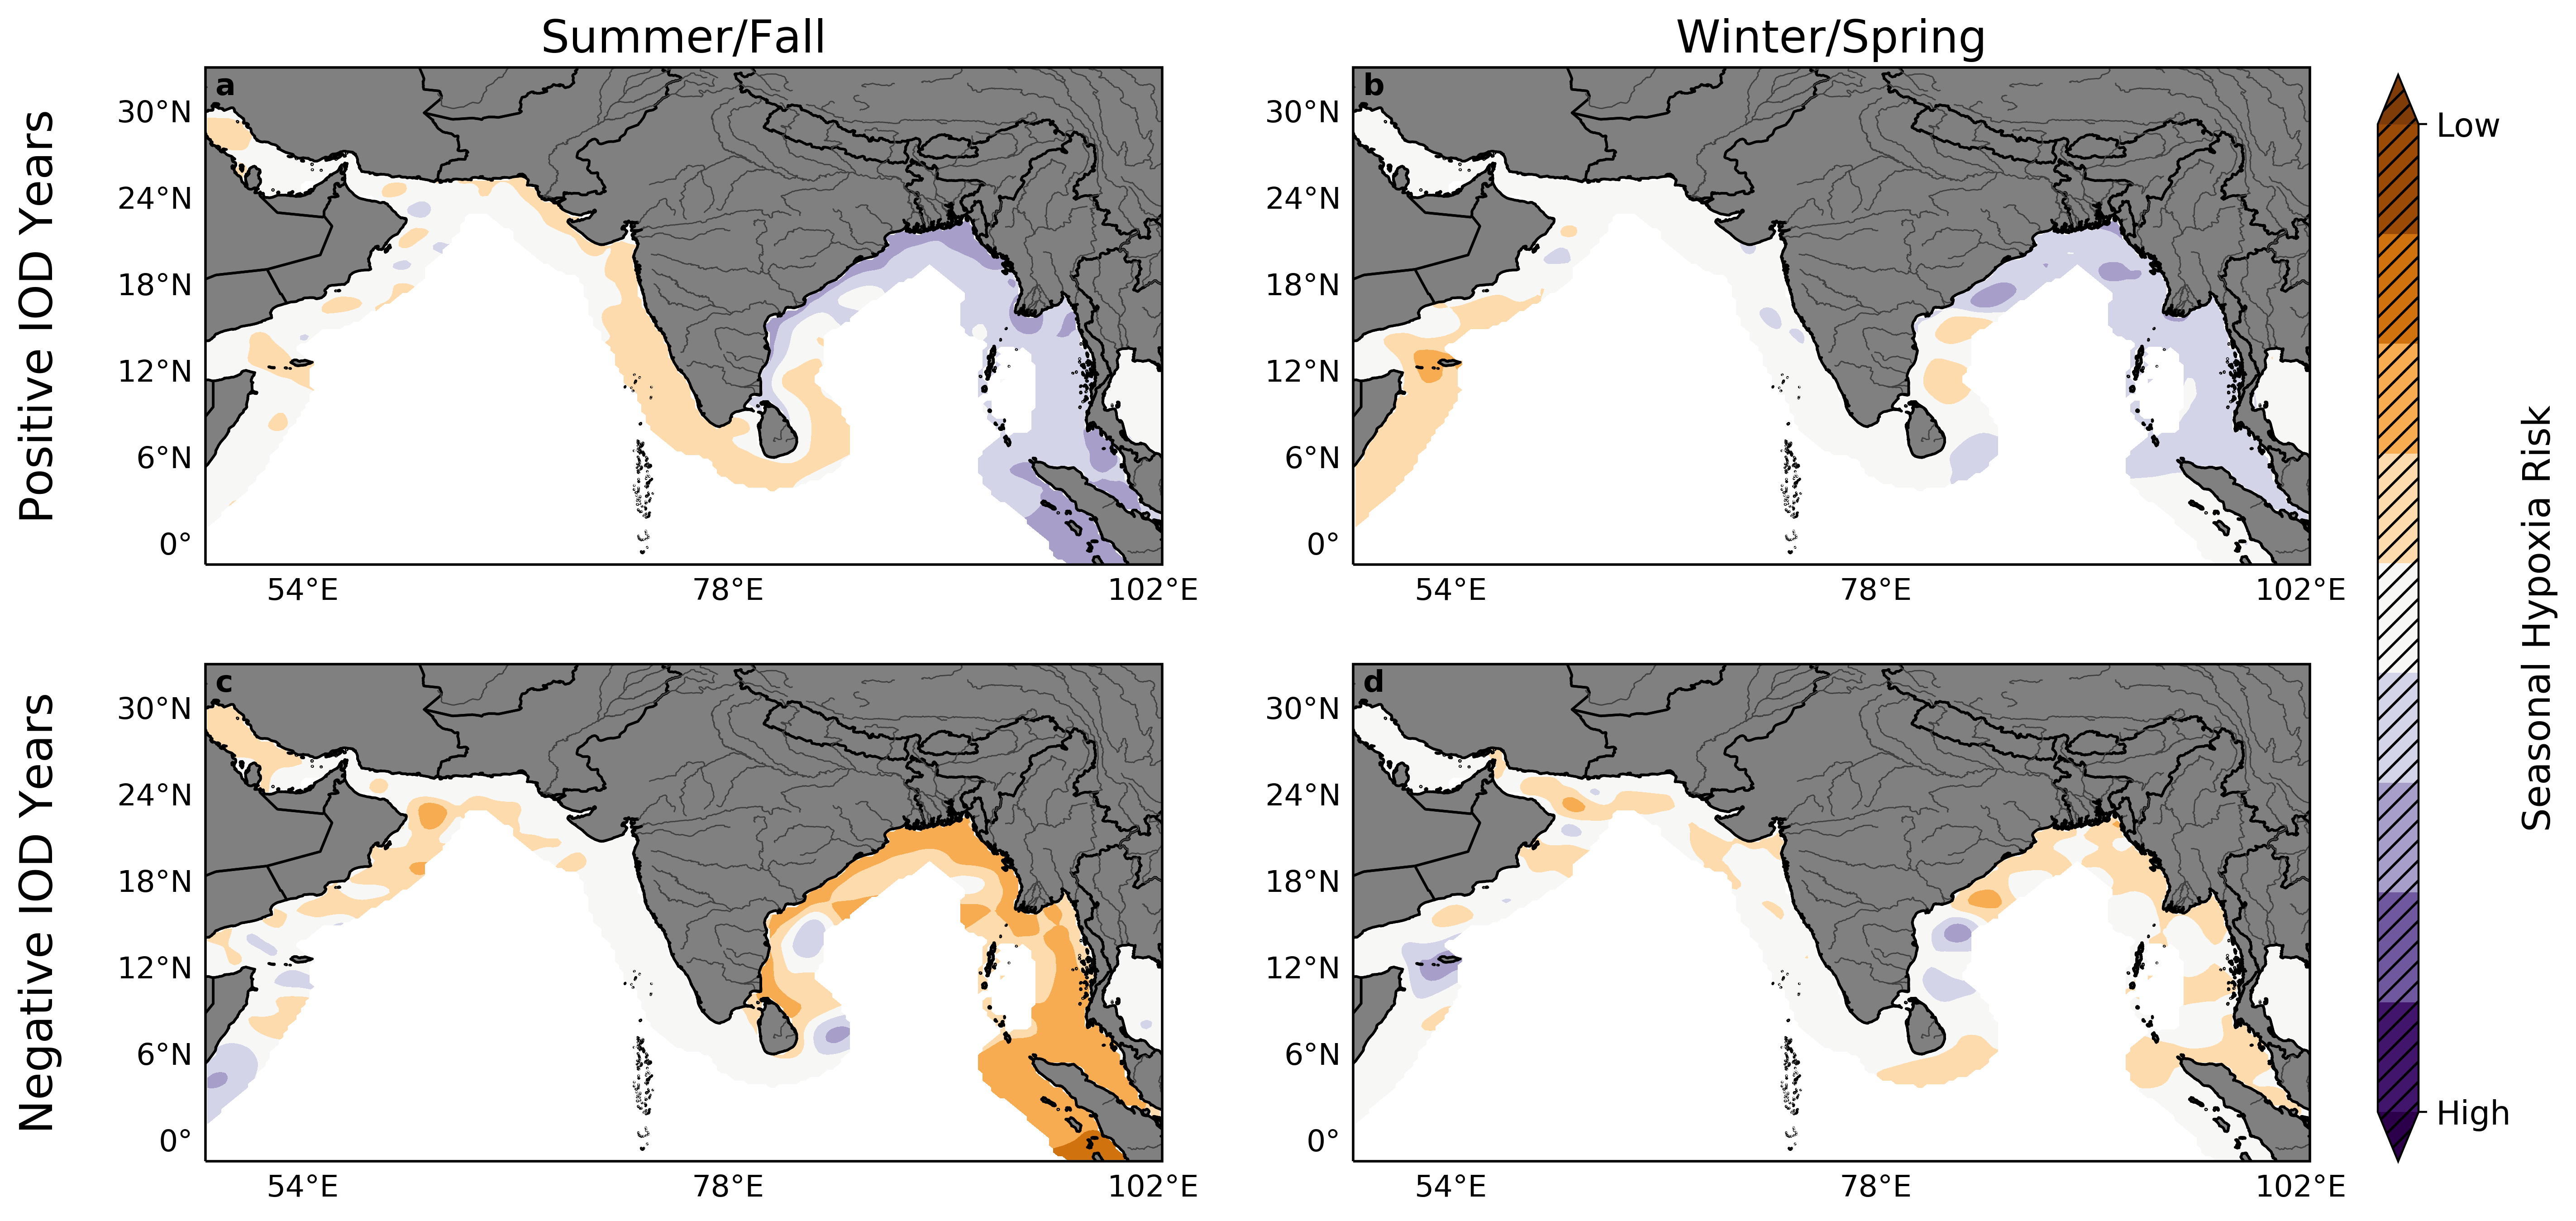

In [21]:
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse

fig = plt.figure(figsize=(15,8),dpi=400)

cmin = -0.15
cmax = 0.15

levels = np.linspace(cmin, cmax, 10)
sz = 30
fsz = 12
alpha = 0.25

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
ax.contourf(xx,yy,piod_anom_sla_sf,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# add bio feedback
e = Ellipse(xy=(78,12),width=1, height=2,angle=0, transform = ccrs.PlateCarree())
ax.add_artist(e)
g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title('Summer/Fall')
ylabel_map(ax,'Positive IOD Years')
add_letter(ax, 'a')

# -----------------------------------------------------------

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
ax.contourf(xx,yy,piod_anom_sla_ws,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

ax.set_xlim(48.5,102.5)
ax.set_ylim(-1.5,33)
g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title('Winter/Spring')
add_letter(ax, 'b')

# -----------------------------------------------------------

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())

ax.contourf(xx,yy,niod_anom_sla_sf,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ylabel_map(ax,'Negative IOD Years')
add_letter(ax, 'c')

# -----------------------------------------------------------

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())

ax.contourf(xx,yy,niod_anom_sla_ws,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
add_letter(ax, 'd')

# -----------------------------------------------------------

cb = add_single_vert_cbar(fig,c,label = 'Seasonal Hypoxia Risk', extend = 'both')
cb.set_ticks([cmin,cmax])
cb.set_ticklabels(['High','Low'])

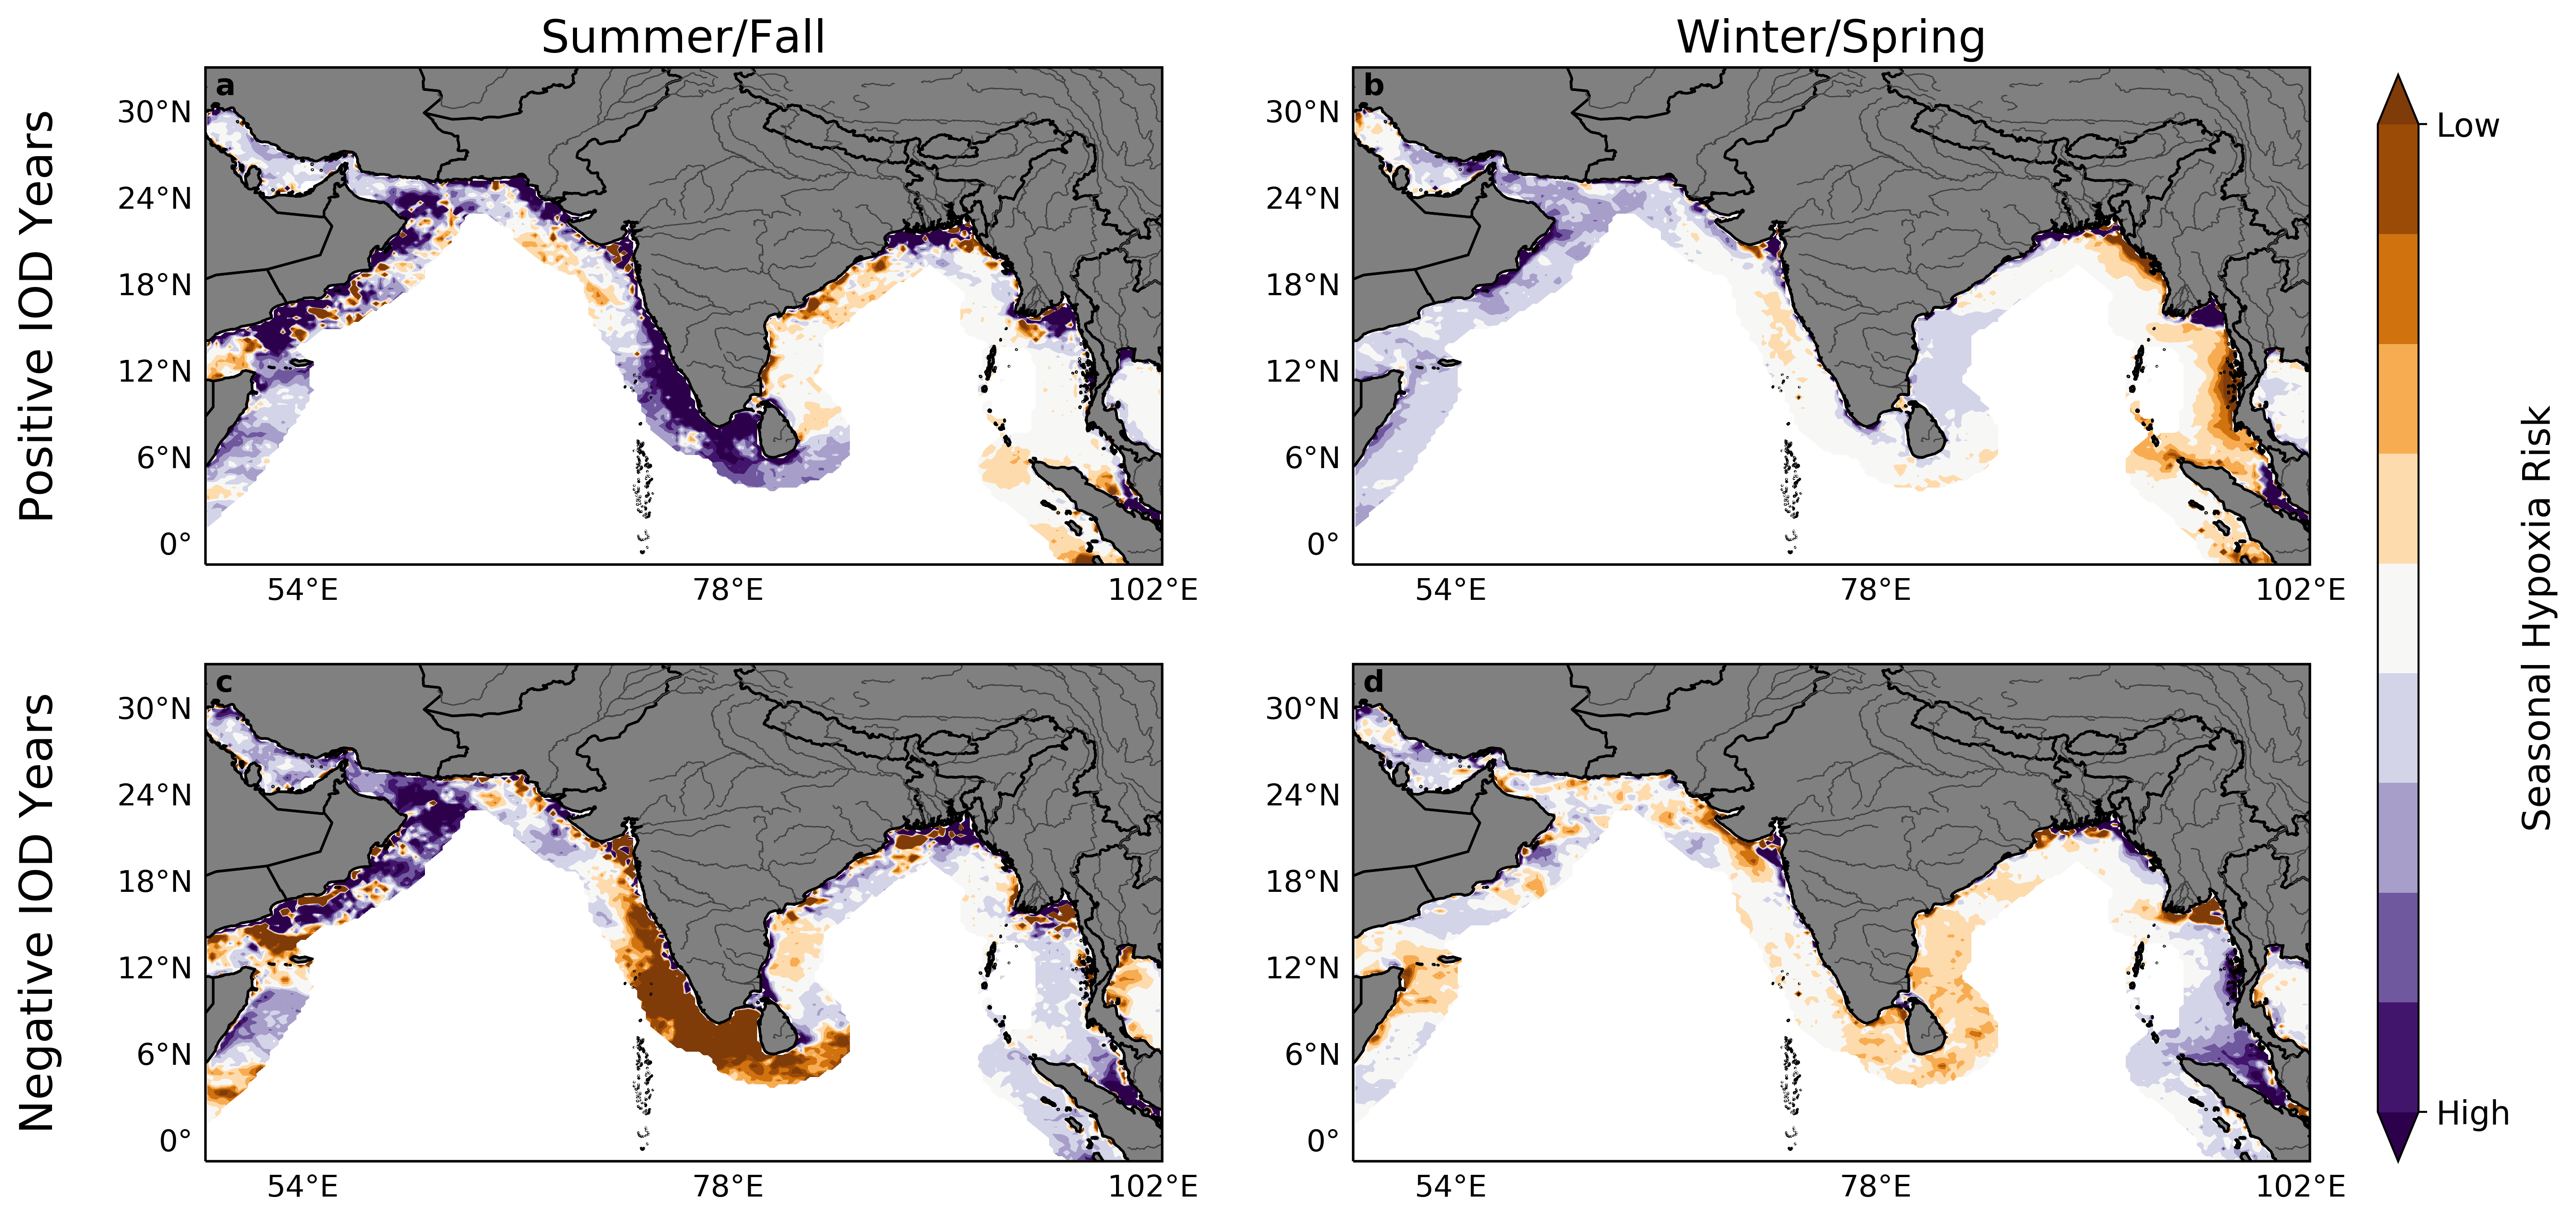

In [23]:
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse

fig = plt.figure(figsize=(15,8),dpi=400)

cmin = -0.15
cmax = 0.15

levels = np.linspace(cmin, cmax, 10)
sz = 30
fsz = 12
alpha = 0.25

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
ax.contourf(xx,yy,piod_anom_chl_sf,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

# add bio feedback
e = Ellipse(xy=(78,12),width=1, height=2,angle=0, transform = ccrs.PlateCarree())
ax.add_artist(e)
g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title('Summer/Fall')
ylabel_map(ax,'Positive IOD Years')
add_letter(ax, 'a')

# -----------------------------------------------------------

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
ax.contourf(xx,yy,piod_anom_chl_ws,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

ax.set_xlim(48.5,102.5)
ax.set_ylim(-1.5,33)
g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ax.set_title('Winter/Spring')
add_letter(ax, 'b')

# -----------------------------------------------------------

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())

ax.contourf(xx,yy,niod_anom_chl_sf,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
ylabel_map(ax,'Negative IOD Years')
add_letter(ax, 'c')

# -----------------------------------------------------------

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())

ax.contourf(xx,yy,niod_anom_chl_ws,
          levels = levels,cmap=plt.cm.PuOr_r,vmax=cmax,vmin=cmin, extend="both")

g = add_land(ax, countries = True, rivers = True, lakes = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 12}
g.ylabel_style = {'size': 12}
add_letter(ax, 'd')

# -----------------------------------------------------------

cb = add_single_vert_cbar(fig,c,label = 'Seasonal Hypoxia Risk', extend = 'both')
cb.set_ticks([cmin,cmax])
cb.set_ticklabels(['High','Low'])